<p style='text-align:center; font-weight:bold'>Predicting Car Prices</p>

<h4 style='text-align:center'>
    Hypothetical Case Scenerio
</h4>
<p>
    Ahmed is a Data Scientist. The current COVID crisis on the taken a toll on Ahmed's finances and Ahmed is currently looking for ways to augument his income. Ahmed a owns Toyota Sedan his father gave him as a graduating gift from college. Ahmed has decided to sell his car to get extra income.  
</p>

<p style='font-weight:bold; text-align:center'>Data Analysis Methodology</p>
Since this project is mainly concerned about the underlying mathematics of linear regression, the data cleaning, preprocessing, and  exploratory data analysis has been seperated into a seperate notebook <a href='https://github.com/paularah/MFC_Linear-Algebra/blob/master/stats.ipynb'>here</a>. Check it out if you're interested in the process the led up to the current conclusions. In summary, the exploratory data analysis process involved: Basic descriptive statistics for the features with continous variables was taken. A Scatter plot was used to examine the strength and direction of the correlation between the each feature as a potential independent variable and the pearson correlation and p.value was taken to validate the results of visualing inspecting the scatter plots.

Basic descriptive stats of the features with categorical variables was taken and visualised using a box plot and the various distribution of car prices within the different groups examined. Analysis of variance test was performed and the F-test score i.e (variation betwen the sample group means divided by the variation within the sample group) and the p-value(i.e confidence degree/statistical significance) was taken 


On analysing the data, the features below have shown the have an impact on the prices of car. So we will feeding our model with these features. 
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway mpg (converted to kilometres)</li>
    <li>Wheel-base</li>
    <li>Bore</li>
    <li>Drive-wheels (encoded and labelled as 4wd, rwd, fwd)</li>
</ul>
<h3 style='text-align:center'>Problem Statement</h3>
<p>Ahmed has been able to lay hands on the owner's manual of his car and historical data on car prices sold in his region over the years. From historical precedence, what is ideal amoout Ahmed should sell his car? Ahmed has decided he needs a certain amount of money and would not sell his car below that amount. Has price Ahmed fixed for his car a fair? Ahmed is trying to fix a price for his car that is at the upper precentile of market price for similar cars to his ensuring that he gains the optimum profit from his sale.</p>

In [92]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path = '/home/arah/Documents/MFC_Linear-Algebra/clean_auto.csv'
tf = pd.read_csv(path)

In [93]:
#extracting only the features we need from the data
df = tf[['length', 'width', 'curb-weight', 'engine-size', 'horsepower',  'highway-mpg', 'wheel-base', 'bore', '4wd', 'rwd', 'fwd', 'price']]

<h4>Using Multiple Linear Regression</h4>
<p>Linear regressions help us infer linear relationships between variables. The allow us to ask how one or more
independent variables can be used to linearly explain or predict a dependent variable.(Arun, 2020). And this case, multiple linear regression explains the linear relationship between the independent variable(s) and the dependent variable</p>


<h3>Mathematical Intuition Behind Linear Regression</h3>
<p>Given the set independent variables, $[length, width, curb.weight, engine.size, horsepower,  highway.mpg, wheel.base, bore, 4wd, rwd, fwd]$ the linear  regression model explians the linear relationship between each independent variable and the price </p>
$$
Price = x_0 + x_1length + x_2width + x_3curb.weight + x_4engine.size + x_5horsepower + x_6highway/km...
$$
<p>where $x_0$ is the intercept and and $x_1 ...$ is the coefficients for the respective independent variables</p>

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse


lr=LinearRegression()
y_data = df['price']
x_data=df.drop('price',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)
lr.fit(x_train, y_train)
yhat_train = lr.predict(x_train)
yhat_test = lr.predict(x_test)

And in this case of Ahmed's model, the coefficients for the repspective independent variable. An decrese/increase in one unit of the independent variable will result in one unit of the respective coefficients. 

In [95]:
lr.coef_

array([ 5.72927901e+03,  6.03895408e+04, -9.45724335e-01,  9.39291974e+01,
        5.07337263e+01,  5.18470415e+01, -2.68744206e+01, -1.20776475e+03,
       -2.53093613e+01,  1.68000443e+03, -1.65469506e+03])

and the intercept for the equation


In [96]:
lr.intercept_

-55828.44072871914

<p>Ahmed  splits the data into training and testing sets. This is important to understand how to the linear regression model will on perform on out of sample data the that reflects the real world scenario. Using the testing set to evaluate how his linear regression model perfor,ms</p>

In [97]:
def dist_plot(x:any, y:any, title:str):
    width = 10
    height = 8
    plt.figure(figsize=(width, height))
    ax1 = sns.distplot(x, hist=False, color="r", label="Actual Value")
    sns.distplot(y, hist=False, color="b", label="Predicted Values" , ax=ax1)
    plt.title(title)
    plt.xlabel('Price')
    plt.ylabel(title)
    plt.show()
    plt.close()

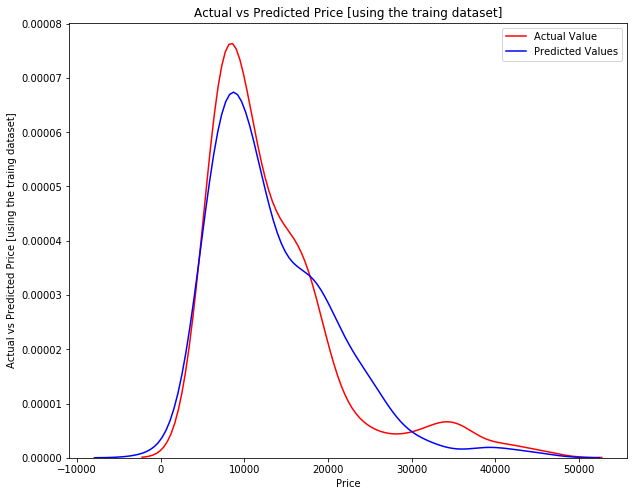

In [98]:
dist_plot(y_train, yhat_train, 'Actual vs Predicted Price [using the traing dataset]')

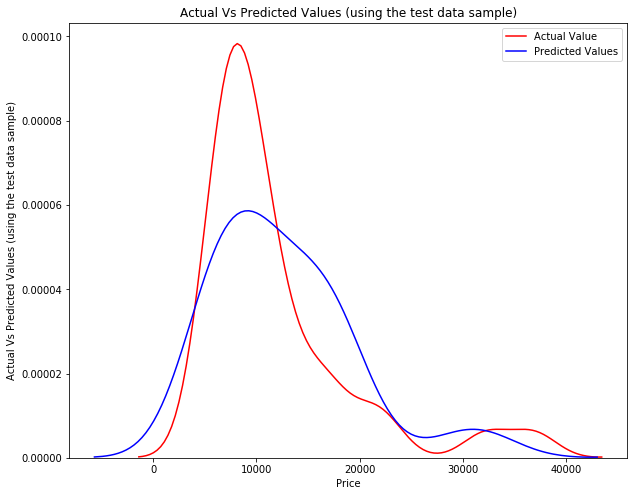

In [99]:
dist_plot(y_test, yhat_test, 'Actual Vs Predicted Values (using the test data sample)')

<h3 style=''>Limitations of Ahmed's Model</h3>

In [100]:
lr.score(x_train, y_train)

0.830259951818427

* The results here show that aproximately 83% of the variation in price is explained by the Ahmed's linear regression model. We can also take the mean squared error i.e the average of the difference between actual value of car prices and the estimated value of car prices to get an ideaof the accuracy of our model


* From looking looking at the in smaple distribution plot, we can that prices from around $700–1400 are not accurately predicted by model and this is further escalated in our out of sample distribution plot. Taking the R-squared error or coefficent of determination, we can determine how close the data is to the fitted regression line. The value of the R-squared is the percentage of variation of the dependent variable that is explained by the linear model.

*  The main limitation of Ahmed's linear regression model is that it assumes that the relationship between  the independent variables and dependent variables is linear. But from the EDA, features like the highway miles per galon differ from this assumption. If we single out this feature and dig further, the scatter plot for highway miles per galon shows a negative linear relationship.

(0, 48156.95972907249)

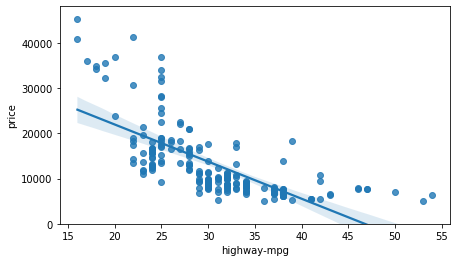

In [101]:
plt.figure(figsize=(7, 4))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

And taking the correlation and its statistical significance also indicators that that highway mpg is a good predictor variable for Ahmed's model.

In [102]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print(f'The pearson Correlation is:{pearson_coef} and the P.value is:{p_value}')

The pearson Correlation is:-0.7046922650589529 and the P.value is:1.7495471144477352e-31


We can visualise the variance using a residual plot. on the scatter plot, the residual is the distance for the points to fitted line. This difference from the observed values of the prices and the predicted values of the prices can be determine if a linear model best fit for the highway miles per galon.  

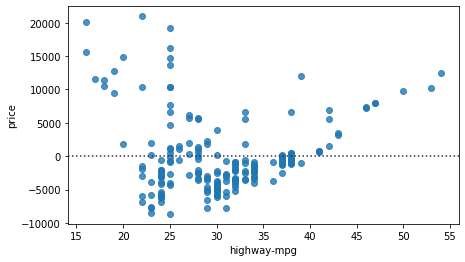

In [103]:
plt.figure(figsize=(7, 4))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

here we see that the residuals are not randomly spread out indicating that the variance is not constant constant. So a linear model after all might not be the best fit this feature. We further validate this by setting higher order terms on this feature and exploring the resulting non-linear/polynomial relationship. 

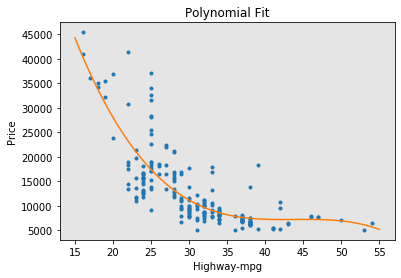

In [104]:
p_transform = np.polyfit(x, y, 3)
p_model = np.poly1d(p_transform)

x_n = np.linspace(15, 55, 100)
y_n = p_model(x_n)

plt.plot(df['highway-mpg'], df['price'], '.', x_n, y_n, '-')
plt.title('Polynomial Fit')
ax = plt.gca()
ax.set_facecolor((0.898, 0.898, 0.898))
fig = plt.gcf()
plt.xlabel('Highway-mpg')
plt.ylabel('Price')
plt.show()

Just by visualy inspecting the linear fit against the polynomial fit, we can already see that the polynomial fit touches more data points. 

References:
<ul>
    <li>Shanmuganathan, A., 2020. Intro To Statistics Notes. [online] Lms.alueducation.com. Available at: https://lms.alueducation.com/asset-v1:ALU+CSMFRW1920+2019_T1+type@asset+block@Intro_Statistics__Notes_.pdf [Accessed 7 August 2020].</li>
    <li>Cognitiveclass.ai. 2020. Data Science And Cognitive Computing Courses - Cognitive Class. [online] Available at: <https://cognitiveclass.ai/> [Accessed 7 August 2020].</li>
    <li>Archive.ics.uci.edu. 2020. UCI Machine Learning Repository: Automobile Data Set. [online] Available at: <https://archive.ics.uci.edu/ml/datasets/Automobile> [Accessed 7 August 2020].</li>
    <li></li>
    
</ul>